# FIAP - Tech Challenge - Fase 4
* Curso: Especialização em Data Analytics
* Aluno: Rubens Ribeiro Campos
* RM: 35870

## 1. Introdução
Os preços do petróleo Brent são influenciados por crises econômicas e eventos globais, tornando sua previsão um desafio.

Diante dessa incerteza, foi encomendada uma análise dos preços e o desenvolvimento de um modelo de Machine Learning para prever variações diárias, além da criação de um dashboard interativo para gerar insights estratégicos e apoiar a tomada de decisão.

## 2. Coleta e preparação dos dados
A seguir, realizaremos a coleta e preparação dos dados históricos do petróleo Brent, garantindo a integridade da série temporal.

Faremos o tratamento de valores ausentes e estruturaremos os dados para facilitar a análise e a modelagem preditiva.

In [59]:
# Importação de bibliotecas essenciais

import warnings
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf

# Importação de módulos específicos

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [60]:
# Obtendo versões das bibliotecas
libraries = {
    "pandas": pd.__version__,
    "numpy": np.__version__,
    "matplotlib": plt.matplotlib.__version__,
    "seaborn": sns.__version__,
    "scikit-learn": sklearn.__version__,
    "statsmodels": statsmodels.__version__,
    "tensorflow": tf.__version__
}

# Exibindo as versões no formato desejado
for lib, version in libraries.items():
    print(f"{lib}=={version}")

pandas==2.2.2
numpy==2.0.2
matplotlib==3.10.0
seaborn==0.13.2
scikit-learn==1.6.1
statsmodels==0.14.4
tensorflow==2.18.0


In [61]:
# Ignorando avisos

warnings.filterwarnings('ignore')

In [62]:
# Carregando os dados de preços do petróleo e exibindo as primeiras linhas do dataframe

df_preco = pd.read_csv('ipeadata_petroleo.csv')
df_preco.head()

,Data,Preço - petróleo bruto - Brent (FOB) - US$ - Energy Information Administration (EIA) - EIA366_PBRENT366,Unnamed: 2
0,20/05/1987,18.63,NaN
1,21/05/1987,18.45,NaN
2,22/05/1987,18.55,NaN
3,23/05/1987,NaN,NaN
4,24/05/1987,NaN,NaN


In [63]:
# Exibindo as informações sobre o dataframe, incluindo tipos de dados e valores nulos

df_preco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13845 entries, 0 to 13844
Data columns (total 3 columns):
 #   Column                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                   --------------  -----  
 0   Data                                                                                                     13845 non-null  object 
 1   Preço - petróleo bruto - Brent (FOB) - US$ - Energy Information Administration (EIA) - EIA366_PBRENT366  11403 non-null  float64
 2   Unnamed: 2                                                                                               0 non-null      float64
dtypes: float64(2), object(1)
memory usage: 324.6+ KB


In [64]:
# Removendo as colunas desnecessárias para manter apenas os dados relevantes

df_preco = df_preco.drop(columns='Unnamed: 2')

In [65]:
# Renomeando as colunas para facilitar o uso e compreensão

df_preco.rename(
    columns={'Data': 'data',
             'Preço - petróleo bruto - Brent (FOB) - US$ - Energy Information Administration (EIA) - EIA366_PBRENT366': 'preco'},
    inplace=True
    )

In [66]:
# Convertendo a coluna de data para o formato datetime para facilitar análises temporais

df_preco['data'] = pd.to_datetime(df_preco['data'])
df_preco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13845 entries, 0 to 13844
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    13845 non-null  datetime64[ns]
 1   preco   11403 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 216.5 KB


In [67]:
# Verificando se há datas faltantes na série temporal

if (df_preco.data.max() - df_preco.data.min()).days == (len(df_preco.data) - 1):
  print('Não falta nenhuma data')
else:
  print('Houston, we have a problem!')

Não falta nenhuma data


In [68]:
# Calculando o percentual de valores nulos para decidir se é necessário tratamento

percental_nulo = (df_preco.preco.isnull().sum() / len(df_preco.preco)) * 100

print('O percentual de valores nulos do meus dataframe é: %.2f%%' % percental_nulo)

O percentual de valores nulos do meus dataframe é: 17.64%


In [69]:
# Tratando valores nulos usando o método backward fill

df_preco['preco'] = df_preco['preco'].ffill()
df_preco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13845 entries, 0 to 13844
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    13845 non-null  datetime64[ns]
 1   preco   13845 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 216.5 KB


In [70]:
# Definindo a coluna de data como índice para facilitar a análise da série temporal

df_preco.set_index('data', inplace=True)

## 3. Visualização dos dados e análise exploratória
Exploraremos visualmente os preços do petróleo, destacando tendências e padrões.

Eventos históricos como crises econômicas e conflitos serão incorporados ao gráfico, ajudando a contextualizar as oscilações do mercado e identificando insights relevantes.

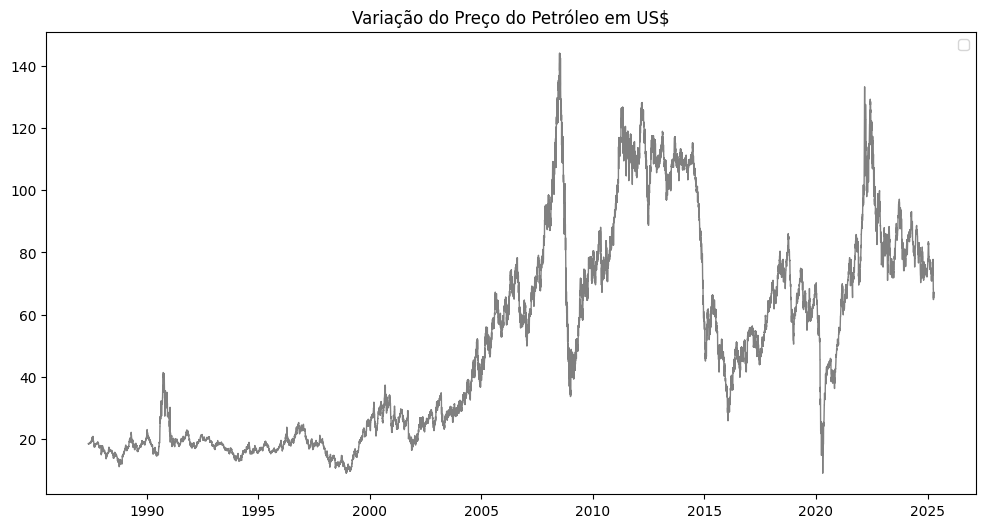

In [71]:
# Visualizando a série temporal

plt.figure(figsize=(12, 6))
plt.plot(df_preco.index, df_preco['preco'], color='grey', linestyle='-', linewidth=1)
plt.title('Variação do Preço do Petróleo em US$')
plt.legend()
plt.show()

In [72]:
# Estatística descritiva básica

df_preco.describe()

,preco
count,13845.000000
mean,50.575285
std,32.905708
min,9.100000
25%,19.400000
50%,44.090000
75%,74.930000
max,143.950000


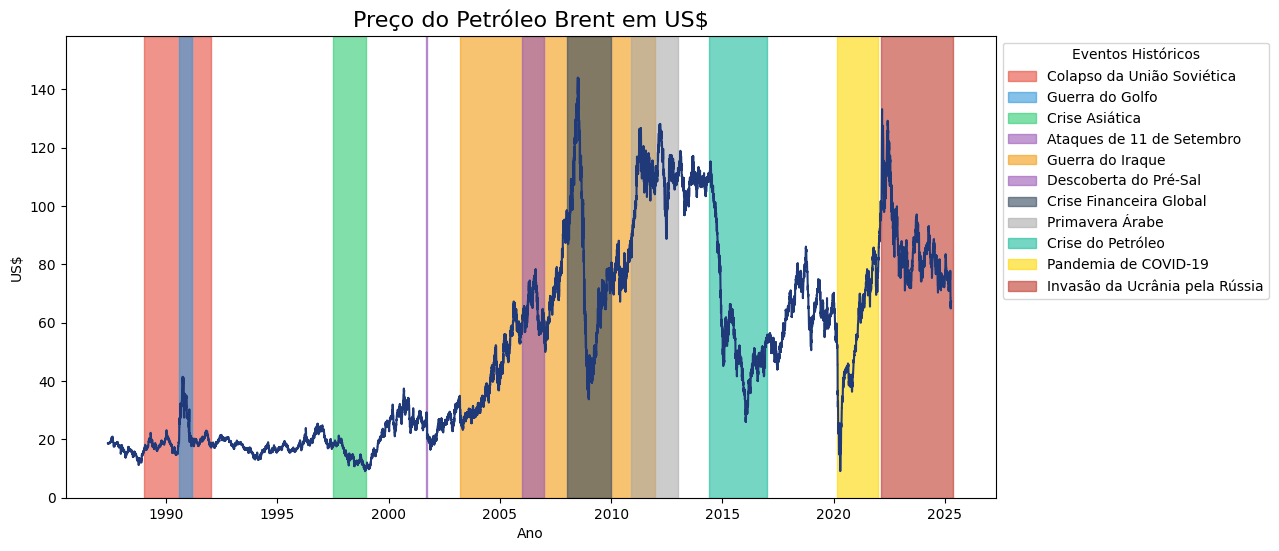

In [73]:
# Situações geopolíticas e crises econômicas

fig, ax = plt.subplots(figsize=(12, 6))

# Gráfico de linha do preço do petróleo

sns.lineplot(data=df_preco, x=df_preco.index, y='preco', ax=ax, color='#1f3979')

eventos = [
    ("1989-01-01", "1991-12-31", "Colapso da União Soviética", "#E74C3C"),  # Vermelho forte
    ("1990-08-02", "1991-02-28", "Guerra do Golfo", "#3498DB"),  # Azul vibrante
    ("1997-07-01", "1998-12-31", "Crise Asiática", "#2ECC71"),  # Verde intenso
    ("2001-09-11", "2001-09-30", "Ataques de 11 de Setembro", "#9B59B6"),  # Roxo forte
    ("2003-03-20", "2011-12-15", "Guerra do Iraque", "#F39C12"),  # Laranja chamativo
    ("2006-01-01", "2006-12-31", "Descoberta do Pré-Sal", "#9B59B6"),  # Roxo forte
    ("2008-01-01", "2009-12-31", "Crise Financeira Global", "#34495E"),  # Cinza escuro
    ("2010-12-01", "2012-12-31", "Primavera Árabe", "#AAAAAA"),  # Preto
    ("2014-06-01", "2016-12-31", "Crise do Petróleo", "#1ABC9C"),  # Verde água
    ("2020-03-01", "2021-12-31", "Pandemia de COVID-19", "#FFD700"),  # Amarelo ouro
    ("2022-02-24", pd.to_datetime("today"), "Invasão da Ucrânia pela Rússia", "#C0392B")  # Vermelho escuro
]

# Criando uma lista de rótulos para legenda

legend_patches = []

for inicio, fim, evento, cor in eventos:
    ax.axvspan(inicio, fim, color=cor, alpha=0.6, label=evento)
    meio = pd.to_datetime(inicio) + (pd.to_datetime(fim) - pd.to_datetime(inicio)) / 2

# Adicionando legenda ao lado do gráfico

ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Eventos Históricos")

ax.set_title('Preço do Petróleo Brent em US$', fontsize=16)
ax.set_ylabel('US$')
ax.set_xlabel('Ano')

# Ajustando o limite do eixo Y

ax.set_ylim(0, df_preco['preco'].max() * 1.10)

plt.show()

### Insigts tirados da interpretação do gráfico acima:

1. Guerra do Golfo (1990-1991): A invasão do Kuwait pelo Iraque gerou uma disparada nos preços devido à incerteza sobre o fornecimento global.
2. Crise Asiática (1997-1998): O colapso das economias emergentes reduziu a demanda, causando queda nos preços.
3. Guerra no Iraque (2003-2011): A instabilidade na região produtora de petróleo fez os preços subirem novamente.
4. Crise Financeira Global (2008-2009): O colapso econômico reduziu o consumo e levou a uma grande queda nos preços.
5. Crise do Petróleo de 2014 (2014-2016): O aumento da produção de petróleo de xisto e a política da OPEP resultaram em uma forte baixa.
6. Pandemia de COVID-19 (2020-2021): A maior queda histórica, com demanda evaporando devido à paralização de atividades e à incerteza global.

In [74]:
# Decompondo a série temporal para visualizar componentes como tendência e sazonalidade

decomposicao = seasonal_decompose(df_preco, model='additive', period=365, two_sided=False)

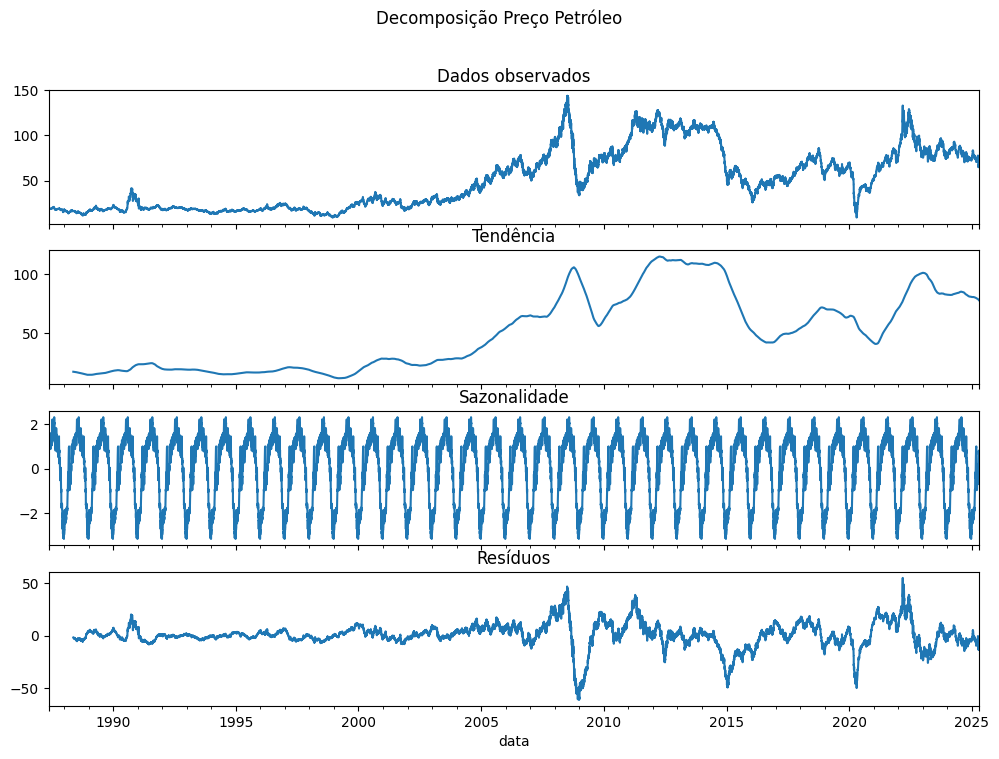

In [75]:
# Criando uma função para plotar a decomposição da série temporal

def plot_decomposicao(decomposicao, title):
  fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(12,8))
  decomposicao.observed.plot(ax=axes[0], title='Dados observados')
  decomposicao.trend.plot(ax=axes[1], title='Tendência')
  decomposicao.seasonal.plot(ax=axes[2], title='Sazonalidade')
  decomposicao.resid.plot(ax=axes[3], title='Resíduos')
  fig.suptitle(title)
  plt.show()

plot_decomposicao(decomposicao, 'Decomposição Preço Petróleo')

In [76]:
# Testando a estacionaridade da série para verificar se é necessário diferenciação

def estac(df):

  adf = adfuller(df)
  print(f'Valor-p do Teste ADF: {adf[1]:.4f}')
  if adf[1] > 0.05:
    print('Não rejeitar a Hipótese Nula: a série não é estacionária\n')
  else:
    print('Rejeitar a Hipótese Nula: a série é estacionária\n')

  kpss_saida = kpss(df)
  print(f'Valor-p do Teste KPSS: {kpss_saida[1]:.4f}')
  if kpss_saida[1] > 0.05:
    print('Não rejeitar a Hipótese Nula: a série é estacionária\n')
  else:
    print('Rejeitar a Hipótese Nula: a série não é estacionária\n')

estac(df_preco)

Valor-p do Teste ADF: 0.1895
Não rejeitar a Hipótese Nula: a série não é estacionária

Valor-p do Teste KPSS: 0.0100
Rejeitar a Hipótese Nula: a série não é estacionária



## 4. Construção do modelo de previsão
Para prever os preços do petróleo, será desenvolvido um modelo baseado em LSTM (Long Short-Term Memory).

A série temporal será normalizada e dividida entre treino e teste.

O modelo terá ajustes, utilizando técnicas como Dropout para evitar overfitting e Early Stopping para otimizar o desempenho.

In [77]:
# Dividindo os dados em treino (70%) e teste (30%) para treinar o modelo

split = int(len(df_preco['preco']) * 0.7)
treino, teste = df_preco['preco'][:split], df_preco['preco'][split:]

train_size = len(treino)

In [78]:
# Normalizando os dados para melhorar a performance do modelo LSTM

scaler = MinMaxScaler(feature_range=(0, 1))
data_train_scaled = scaler.fit_transform(treino.values.reshape(-1, 1))
data_test_scaled = scaler.transform(teste.values.reshape(-1, 1))

Esse trecho de código cria uma função create_sequences que transforma os dados de entrada em sequências de tamanho seq_length, facilitando o treinamento de um modelo LSTM. Ele percorre os dados e, para cada posição i, armazena uma janela de seq_length pontos em X, enquanto o valor seguinte na série é armazenado em y. Isso permite que o modelo aprenda padrões temporais, prevendo o próximo valor com base nos anteriores. Por fim, a função é aplicada aos conjuntos de treino e teste para preparar os dados para o treinamento do modelo:

In [79]:
# Criação da função para criar sequências de dados de treinamento

def create_sequences(data, seq_length=1):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i+seq_length), 0])
        y.append(data[i+seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 15
X_train, y_train = create_sequences(data_train_scaled, seq_length)
X_test, y_test = create_sequences(data_test_scaled, seq_length)

Esse código ajusta os arrays X_train e X_test para o formato esperado por um modelo LSTM: [samples, time steps, features]. Ele garante que os dados tenham três dimensões, onde cada amostra contém uma sequência temporal (time steps) e cada ponto dessa sequência possui uma única característica (features = 1). Esse formato é essencial para que o LSTM processe corretamente as informações ao longo do tempo:

In [80]:
# Remodelando o input para ser [samples, time steps, features]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

### 4.1. Modelo LSTM



In [81]:
# Construindo o modelo de previsão

model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, activation='relu', return_sequences=False),
    Dropout(0.2), # 20% dos neurônios desativados aleatoriamente para prevenir o overfitting
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

In [82]:
# Treinando o modelo com Early Stopping para evitar superajuste

early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

model.fit(X_train, y_train, batch_size=1, epochs=3, verbose=1, callbacks=[early_stopping])

Epoch 1/3
9676/9676 ━━━━━━━━━━━━━━━━━━━━ 95s 9ms/step - loss: 0.0042
Epoch 2/3
9676/9676 ━━━━━━━━━━━━━━━━━━━━ 93s 10ms/step - loss: 0.0019
Epoch 3/3
9676/9676 ━━━━━━━━━━━━━━━━━━━━ 140s 9ms/step - loss: 0.0017


In [83]:
# Fazendo previsões

train_predictions = model.predict(X_train)
test_predictions = model. predict(X_test)

303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [84]:
# Invertendo a normalização para obter valores reais

train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))

test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

Esse código realiza previsões futuras usando um modelo LSTM. Ele começa pegando os últimos seq_length pontos da série temporal e os ajusta como entrada para o modelo. Em seguida, dentro de um loop, ele prevê o próximo valor, adiciona esse valor à lista de previsões e atualiza a entrada para incluir essa nova previsão, garantindo que cada novo passo utilize os dados mais recentes. Por fim, os valores previstos são transformados de volta à escala original com inverse_transform, garantindo que os resultados possam ser interpretados corretamente:

In [85]:
# Previsão para datas futuras

last_60_days = data_train_scaled[-seq_length:]
future_input = last_60_days.reshape(1, -seq_length, 1)
future_forecast = []
prediction_ahead = 30

for _ in range(prediction_ahead):
  next_pred = model.predict(future_input)[0, 0]
  future_forecast.append(next_pred)
  next_input = np.append(future_input[0, 1:], [[next_pred]], axis=0)
  future_input = next_input.reshape(1, seq_length, 1)

future_forecast = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━

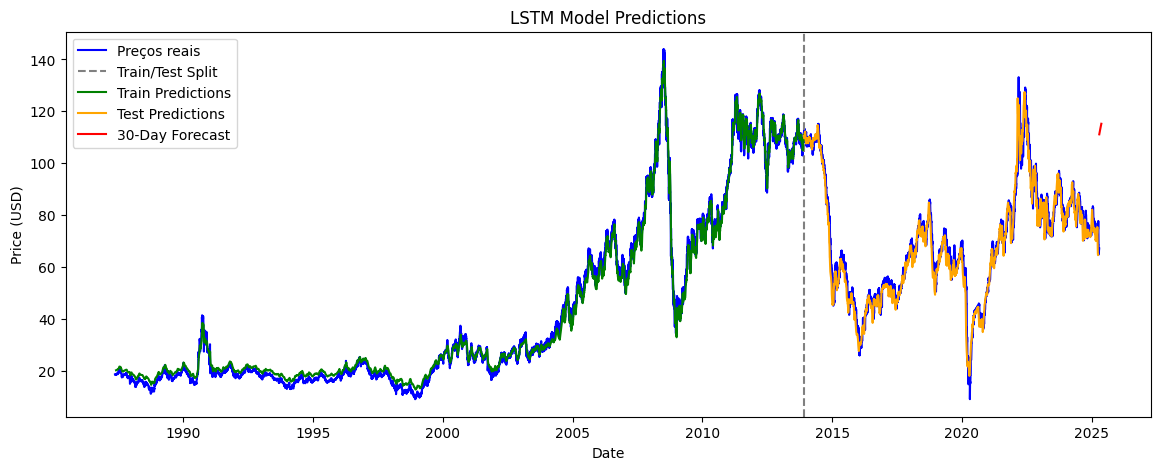

In [86]:
# Plotando os resultados
plt.figure(figsize=(14, 5))
plt.plot(df_preco.index, df_preco['preco'], label='Preços reais', color='blue')
plt.axvline(x=df_preco.index[train_size], color='gray', linestyle='--', label='Train/Test Split' )

# Treino/teste
train_range = df_preco.index[seq_length:train_size]
test_range = df_preco.index[train_size:train_size + len(test_predictions)]
plt.plot(train_range, train_predictions[:len(train_range)], label='Train Predictions', color='green' )
plt.plot(test_range, test_predictions[:len(test_range)], label='Test Predictions', color='orange')

# Predições
future_index = pd.date_range(start=df_preco.index[-1], periods=prediction_ahead + 1, freq='D') [1:]
plt.plot(future_index, future_forecast, label=f'{prediction_ahead}-Day Forecast', color='red')

plt.title('LSTM Model Predictions')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [87]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

previsoes_completas = np.concatenate((train_predictions, test_predictions), axis=0)

# Ajustando o índice para garantir que previsoes_completas esteja alinhada com os dados reais
indice_previsoes = df_preco.index[seq_length:seq_length + len(previsoes_completas)]

# Filtrando os valores reais para corresponder ao tamanho das previsões
valores_reais_correspondentes = df_preco['preco'].iloc[seq_length:seq_length + len(previsoes_completas)]

# Calculando métricas com valores alinhados
mape = mean_absolute_percentage_error(valores_reais_correspondentes, previsoes_completas) * 100
mae = mean_absolute_error(valores_reais_correspondentes, previsoes_completas)
rmse = np.sqrt(mean_squared_error(valores_reais_correspondentes, previsoes_completas))

# Exibindo as métricas
print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')

# Calculando a acurácia do modelo
acuracia = 100 - mape

print(f'Acurácia: {acuracia:.2f}%')

MAPE: 6.49%
MAE: 2.2363
RMSE: 3.0291
Acurácia: 93.51%


Com base na acurácia obtida, o modelo LSTM apresentou um desempenho sólido na previsão dos preços do petróleo. O MAPE indica o percentual que os erros médios representam do valor real, mostrando uma previsão razoável. O MAE e o RMSE evidenciam a magnitude dos erros, sendo o RMSE mais sensível a variações extremas. Apesar dos bons resultados, melhorias podem ser exploradas para aumentar a precisão, como ajustes de hiperparâmetros e aumento do conjunto de treinamento.


## 5. Conclusão
A análise dos preços do petróleo Brent demonstrou como fatores econômicos e geopolíticos impactam diretamente o mercado.

O dashboard interativo e o modelo de previsão oferecem ferramentas valiosas para tomada de decisão, permitindo que empresas do setor energético tenham uma visão estratégica para mitigar riscos e otimizar suas operações.

## 6. Saiba mais

* [Fonte dos dados: Ipeadata](http://www.ipeadata.gov.br/Default.aspx)
* [Projeto completo no GitHub](https://github.com/rcrubens/modelo_lstm_preco_petroleo)
* [Deploy do modelo no Streamlit](https://modelolstmprecopetroleo.streamlit.app/)
* [Vídeo de apresentação do projeto](https://youtu.be/3W3_oOosb8A)